# Convolutional neural network

In [1]:
import tensorflow as tf
import keras as k
#python==3.6.9



import numpy as np
from matplotlib import pyplot as plt


from keras.preprocessing import image

from keras.models import Sequential

from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.preprocessing.image import ImageDataGenerator 



print(tf.__version__)
print(k.__version__)
print(np.__version__)

2.6.0
2.6.0
1.16.6


In [2]:
import os
import numpy as np
import pandas as pd
from PIL import Image

from keras.preprocessing import image
from skimage.io import imread
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras import backend as K

In [3]:

model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = (224,224,3))) 
model.add(Activation('relu')) 

 
model.add(MaxPooling2D(pool_size =(2, 2))) 
model.add(Conv2D(32, (2, 2),padding='same')) 
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size =(2, 2))) 
model.add(Conv2D(64, (2, 2),padding='same')) 
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size =(2, 2))) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(128, (2, 2),padding='same')) 
model.add(Activation('relu'))
  
model.add(Conv2D(128, (2, 2),padding='valid')) 
model.add(Activation('relu')) 

model.add(MaxPooling2D(pool_size =(2, 2),strides=(1,1))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 

 

####model.add(Dropout(0.1))
model.add(Dense(3)) 
model.add(Activation('sigmoid'))



model.compile(loss ='categorical_crossentropy', optimizer ='adam',metrics =['accuracy']) 


In [4]:
import sklearn

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


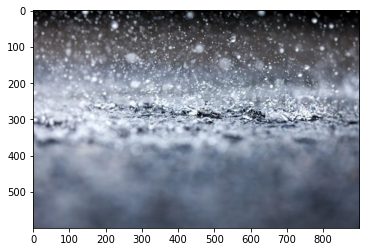

In [6]:
img = image.load_img("C:\\Users\\User\\Desktop\\rain-3964186_960_720-900x600.jpg")
plt.imshow(img)

In [7]:
 train = train_datagen.flow_from_directory(r"E:\\dataset for CNN\\d1\\new dataset\\train",
                                                 target_size = (224,224),
                                                 batch_size = 30,
                                                 class_mode = "categorical")

test = test_datagen.flow_from_directory(r"E:\\dataset for CNN\\d1\\new dataset\\test",
                                            target_size = (224,224),
                                            batch_size = 30,
                                            class_mode = 'categorical')


Found 1498 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [8]:
model1 = Sequential()
model1.add(VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3)))
model1.add(Flatten())
model1.add(Dense(128, activation="relu"))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(3, activation="sigmoid"))
 
model1.layers[-6].trainable = False
 
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 17,938,691
Trainable params: 3,224,003
Non-trainable params: 14,714,688
__________________________________

In [9]:
# Compiling the model
model1.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

# Setting the learning rate as 0.0015
K.set_value(model.optimizer.learning_rate, 0.0015)

In [10]:

history1 = model1.fit_generator(train,steps_per_epoch = 25,
                         epochs = 10,validation_data = test, 
                            validation_steps = 100)

C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
25/25 [==============================] - 416s 17s/step - loss: 0.8263 - accuracy: 0.6587 - val_loss: 0.9317 - val_accuracy: 0.5767
Epoch 2/10
25/25 [==============================] - 229s 9s/step - loss: 0.5233 - accuracy: 0.7720
Epoch 3/10
25/25 [==============================] - 229s 9s/step - loss: 0.2984 - accuracy: 0.8520
Epoch 4/10
25/25 [==============================] - 232s 9s/step - loss: 0.2437 - accuracy: 0.8653
Epoch 5/10
25/25 [==============================] - 262s 11s/step - loss: 0.2356 - accuracy: 0.8824
Epoch 6/10
25/25 [==============================] - 270s 11s/step - loss: 0.2328 - accuracy: 0.8707
Epoch 7/10
25/25 [==============================] - 296s 12s/step - loss: 0.2087 - accuracy: 0.9051
Epoch 8/10
25/25 [==============================] - 286s 11s/step - loss: 0.2183 - accuracy: 0.9040
Epoch 9/10
25/25 [==============================] - 278s 11s/step - loss: 0.2284 - accuracy: 0.8840
Epoch 10/10
25/25 [==============================] - 267s 11s

In [11]:

history = model.fit_generator(train,steps_per_epoch = 25,
                         epochs = 10,validation_data = test, 
                            validation_steps = 100)

Epoch 1/10
25/25 [==============================] - 34s 1s/step - loss: 0.7085 - accuracy: 0.7280 - val_loss: 0.6318 - val_accuracy: 0.5900
Epoch 2/10
25/25 [==============================] - 26s 1s/step - loss: 0.2856 - accuracy: 0.8182
Epoch 3/10
25/25 [==============================] - 26s 1s/step - loss: 0.2864 - accuracy: 0.8275
Epoch 4/10
25/25 [==============================] - 26s 1s/step - loss: 0.2428 - accuracy: 0.8573
Epoch 5/10
25/25 [==============================] - 27s 1s/step - loss: 0.2412 - accuracy: 0.8503
Epoch 6/10
25/25 [==============================] - 25s 978ms/step - loss: 0.2294 - accuracy: 0.8489
Epoch 7/10
25/25 [==============================] - 24s 937ms/step - loss: 0.2646 - accuracy: 0.8636
Epoch 8/10
25/25 [==============================] - 23s 917ms/step - loss: 0.2631 - accuracy: 0.8600
Epoch 9/10
25/25 [==============================] - 23s 912ms/step - loss: 0.2465 - accuracy: 0.8596
Epoch 10/10
25/25 [==============================] - 23s 918ms/s

In [30]:
train.class_indices

{'Tomato___healthy': 0, 'hot_dog': 1, 'not_hot_dog': 2}

#**** GRAPHICAL REPRESENTATION***

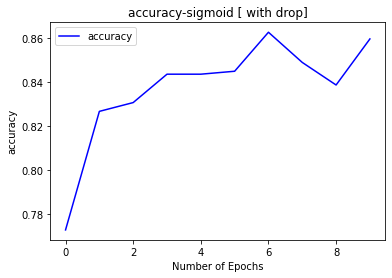

In [31]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['accuracy'], color='b', label="accuracy")
plt.title("accuracy-sigmoid [ with drop]")
plt.xlabel("Number of Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

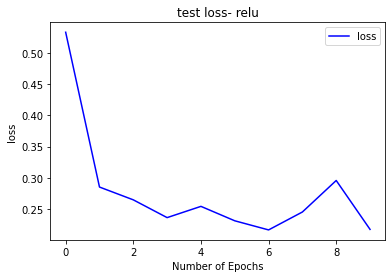

In [32]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['loss'], color='b', label="loss")
plt.title("test loss- relu")
plt.xlabel("Number of Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [25]:
test_image = image.load_img('',
                            target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
    print('cloud')
elif result[0][1]==1:
    print('rain')
elif result[0][2]==1:
    print('shine')
    

cloud


In [26]:
test_image = image.load_img('/content/rain-3964186_960_720-900x600.jpg',
                            target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
    print('cloud')
elif result[0][1]==1:
    print('rain')
elif result[0][2]==1:
    print('shine')

rain


In [27]:
model.save('flowers.h5')